## Checking basic derivation

Define a basic function and check changes by incrementing tiny values

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def samplefunction(x):
    return 4*x**2 + 4*x + 4

samplefunction(1)

12

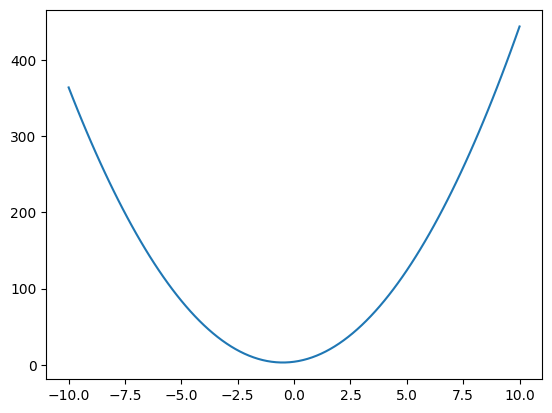

In [3]:
x_points = np.arange(-10, 10.2, 0.2)
y_points = samplefunction(x_points)
plt.plot(x_points, y_points)

In [4]:
x = 0.5

# d(samplefunction(x))/dx = 8*x + 4
# when x = 0.5 => 8*0.5 + 4 = 8

h1 = 0.00001
h2 = 0.000000001
print(f"Value of derivative when incremented by 0.00001: {(samplefunction(x+h1) - samplefunction(x))/h1}")
print(f"Value of derivative when incremented by 0.000000001: {(samplefunction(x+h2) - samplefunction(x))/h2}")

Value of derivative when incremented by 0.00001: 8.000039999966901
Value of derivative when incremented by 0.000000001: 7.999999773744547


## Define graphviz

A library to plot graphs, here it will help us to plot the network

In [38]:
from graphviz import Digraph

#construct nodes and edges
def construct(node, nodes, edges):
    if node not in nodes:
        nodes.add(node)
        for child in node._prev:
            edges.add((child, node))
            construct(child, nodes, edges)

#calls construct for the first time
def dfs(root):
    nodes = set()
    edges = set()
    construct(root, nodes, edges)
    return nodes, edges

#constructs the graph
def graph(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = dfs(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
          dot.node(name = uid + n._op, label = n._op)
          dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

## Define class for each variable

This is a wrapper around each variable which helps us to do various operations on it based on our definitions

In [55]:
class Variable:

    def __init__(self, value, op='', name=''):
        self.value = value
        self.grad = 0.0
        self.op = op
        self.name = name

    def __repr__(self):
        if(self.name != ''):
            return f"Variable(value={self.value}, name='{self.name}')"
        return f"Variable(value={self.value})"

    def __add__(self, next):
        out = Variable(self.value + next.value, '+')
        return out

    def __mul__(self, next):
        out = Variable(self.value * next.value, '*')
        return out

a = Variable(2.0)
b = Variable(-3.0)
c = Variable(1.0)
a*b + c

Variable(value=-5.0)